<a href="https://colab.research.google.com/github/inwoo01/math2/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

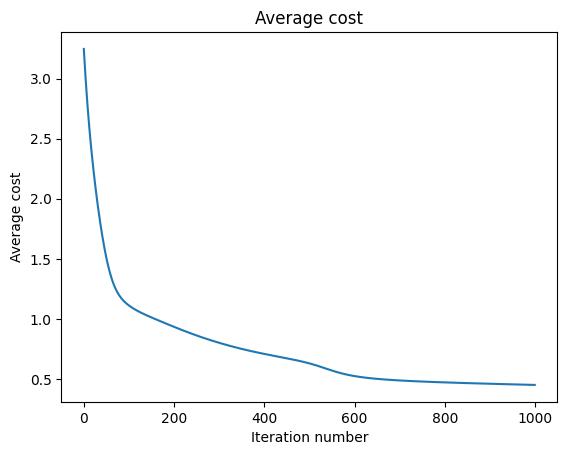

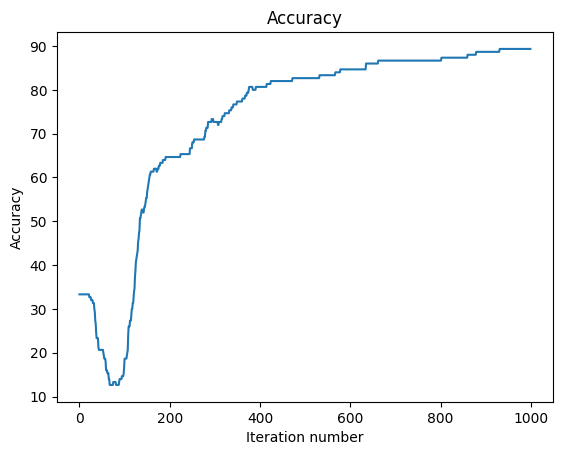

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 소프트맥스 함수 정의
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# 손실 함수 정의
def loss(y_pred, y_true):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred)) / m

# 가중치 초기화
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(0)
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

# 신경망 정의
def neural_network(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    return Z1, A1, Z2

# 학습
def train(X, y, learning_rate, num_iterations):
    input_size = X.shape[1]
    hidden_size = 16
    output_size = y.shape[1]  # 출력층 뉴런 수를 클래스의 수에 맞게 설정

    # 가중치 초기화
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

    # 학습
    costs = []
    accuracies = []
    for i in range(num_iterations):
        # Forward pass
        Z1, A1, Z2 = neural_network(X, W1, b1, W2, b2)

        # 소프트맥스 함수 적용
        A2 = softmax(Z2)

        # Loss
        cost = loss(A2, y)
        costs.append(cost)

        # Accuracy
        y_pred_labels = np.argmax(A2, axis=1)
        y_true_labels = np.argmax(y, axis=1)
        accuracy = 100 * (np.mean(y_pred_labels == y_true_labels))
        accuracies.append(accuracy)

        # Backpropagation
        m = y.shape[0]
        dZ2 = A2 - y
        dW2 = np.dot(A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * (A1 * (1 - A1))
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Gradient descent
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

    return W1, b1, W2, b2, costs, accuracies

# 데이터 로드
data = pd.read_csv('Iris.csv')

# 입력과 출력 분리
X = data.iloc[:, 1:-1].values
y = pd.get_dummies(data.iloc[:, -1]).values

# 학습
learning_rate = 0.01
num_iterations = 1000
W1, b1, W2, b2, costs, accuracies = train(X, y, learning_rate, num_iterations)

# 손실 그래프 그리기
plt.plot(range(num_iterations), costs)
plt.xlabel('Iteration number')
plt.ylabel('Average cost')
plt.title('Average cost')
plt.show()

# 정확도 그래프 그리기
plt.plot(range(num_iterations), accuracies)
plt.xlabel('Iteration number')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.show()